In [1]:
import torch, random, sys

import tonic
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

from sinabs.activation.surrogate_gradient_fn import PeriodicExponential

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../../utils')
sys.path.append('../models')

from train_test_fn import training_loop, load_dataset, load_architecture
from weight_initialization import rescale_method_1

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('device: ', torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')

device:  NVIDIA GeForce RTX 3070 Ti


In [3]:
rand_seed = 1

In [4]:
achitecture = 'ResSCNN_5'

In [5]:
torch.backends.cudnn.enabled = False
torch.backends.cudnn.deterministic = True
random.seed(rand_seed)
torch.manual_seed(rand_seed)
torch.cuda.manual_seed(rand_seed)
np.random.seed(rand_seed)

In [6]:
batch_size = 8
num_workers = 4
epochs = 50
n_time_steps = 50

lr = 5e-5
spk_thr = 2.0
v_min = -0.5
grad_scale = 1.75
grad_width = 0.5
w_rescale_lambda = 0.6

## Loading Data

In [7]:
snn_train_dataset, snn_test_dataset, sensor_size = load_dataset('DVSGESTURE', n_time_steps)

getting validation dataset....

disk caching samples...

In [8]:
disk_cache_train = tonic.DiskCachedDataset(
    dataset=snn_train_dataset,
    cache_path='./cached_train'
)
snn_train_dataloader = DataLoader(disk_cache_train, batch_size=batch_size, num_workers=num_workers, drop_last=True, shuffle=True)

disk_cache_test = tonic.DiskCachedDataset(
    dataset=snn_test_dataset,
    cache_path='./cached_test'
)
snn_test_dataloader = DataLoader(disk_cache_test, batch_size=batch_size, num_workers=num_workers, drop_last=True, shuffle=False)

## Network Module

In [9]:
snn = load_architecture(achitecture, sensor_size, 11, batch_size, PeriodicExponential(grad_scale=grad_scale, grad_width=grad_width), v_min, spk_thr).to(device)
snn.init_weights()

ModuleNotFoundError: No module named 'sinabs.exodus'

In [ ]:
snn.rescale_conv_weights(rescale_method_1, w_rescale_lambda)

In [ ]:
optimizer = Adam(snn.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-8)
loss_fn = CrossEntropyLoss()

## Training loop

In [ ]:
epochs_x, epochs_y, epochs_acc = training_loop(
    device, 
    n_time_steps,
    batch_size,
    sensor_size,
    snn_train_dataloader, 
    snn, 
    loss_fn, 
    optimizer, 
    epochs, 
    snn_test_dataloader)

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 0 accuracy: 18.560606060606062


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 1 accuracy: 33.71212121212121


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 2 accuracy: 46.96969696969697


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 3 accuracy: 53.40909090909091


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 4 accuracy: 56.060606060606055


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 5 accuracy: 57.57575757575758


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 6 accuracy: 60.60606060606061


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 7 accuracy: 61.36363636363637


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 8 accuracy: 60.22727272727273


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 9 accuracy: 65.15151515151516


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 10 accuracy: 68.18181818181817


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 11 accuracy: 67.04545454545455


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 12 accuracy: 67.42424242424242


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 13 accuracy: 62.5


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 14 accuracy: 57.1969696969697


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 15 accuracy: 61.36363636363637


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 16 accuracy: 62.878787878787875


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 17 accuracy: 64.77272727272727


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 18 accuracy: 66.28787878787878


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 19 accuracy: 71.21212121212122


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 20 accuracy: 64.01515151515152


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 21 accuracy: 63.25757575757576


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 22 accuracy: 64.39393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 23 accuracy: 64.39393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 24 accuracy: 64.77272727272727


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 25 accuracy: 65.53030303030303


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 26 accuracy: 64.77272727272727


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 27 accuracy: 64.77272727272727


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 28 accuracy: 63.63636363636363


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 29 accuracy: 61.74242424242424


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 30 accuracy: 67.8030303030303


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 31 accuracy: 65.53030303030303


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 32 accuracy: 64.39393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 33 accuracy: 62.878787878787875


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 34 accuracy: 70.83333333333334


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 35 accuracy: 65.53030303030303


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 36 accuracy: 63.63636363636363


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 37 accuracy: 65.9090909090909


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 38 accuracy: 64.01515151515152


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 39 accuracy: 61.74242424242424


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 40 accuracy: 63.63636363636363


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 41 accuracy: 64.39393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 42 accuracy: 68.18181818181817


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 43 accuracy: 63.63636363636363


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 44 accuracy: 64.39393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 45 accuracy: 64.01515151515152


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 46 accuracy: 59.84848484848485


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 47 accuracy: 67.42424242424242


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 48 accuracy: 68.18181818181817


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 49 accuracy: 64.39393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 50 accuracy: 65.9090909090909


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 51 accuracy: 66.28787878787878


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 52 accuracy: 73.10606060606061


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 53 accuracy: 62.5


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 54 accuracy: 71.96969696969697


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 55 accuracy: 75.0


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 56 accuracy: 70.45454545454545


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 57 accuracy: 70.83333333333334


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 58 accuracy: 69.6969696969697


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 59 accuracy: 71.96969696969697


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 60 accuracy: 70.45454545454545


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 61 accuracy: 67.42424242424242


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 62 accuracy: 72.72727272727273


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 63 accuracy: 69.6969696969697


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 64 accuracy: 71.5909090909091


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 65 accuracy: 70.45454545454545


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 66 accuracy: 70.07575757575758


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 67 accuracy: 72.34848484848484


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 68 accuracy: 70.83333333333334


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 69 accuracy: 70.45454545454545


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 70 accuracy: 75.0


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 71 accuracy: 76.13636363636364


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 72 accuracy: 76.51515151515152


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 73 accuracy: 73.86363636363636


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 74 accuracy: 74.24242424242425


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 75 accuracy: 75.75757575757575


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 76 accuracy: 70.83333333333334


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 77 accuracy: 76.13636363636364


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 78 accuracy: 76.89393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 79 accuracy: 76.51515151515152


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 80 accuracy: 76.51515151515152


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 81 accuracy: 78.78787878787878


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 82 accuracy: 78.4090909090909


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 83 accuracy: 77.65151515151516


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 84 accuracy: 79.16666666666666


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 85 accuracy: 77.27272727272727


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 86 accuracy: 79.16666666666666


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 87 accuracy: 77.65151515151516


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 88 accuracy: 79.16666666666666


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 89 accuracy: 71.96969696969697


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 90 accuracy: 76.89393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 91 accuracy: 78.03030303030303


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 92 accuracy: 74.62121212121212


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 93 accuracy: 76.89393939393939


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 94 accuracy: 74.24242424242425


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 95 accuracy: 75.75757575757575


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 96 accuracy: 81.06060606060606


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 97 accuracy: 81.81818181818183


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 98 accuracy: 80.68181818181817


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch 99 accuracy: 81.81818181818183


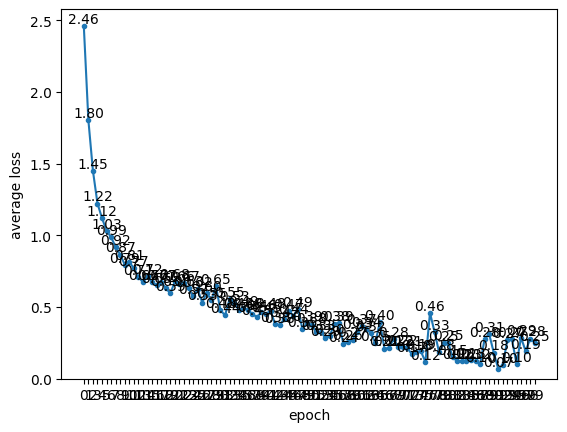

In [ ]:
y_avg = []
for y in epochs_y:
    y_avg.append(np.mean(y))

plt.plot(np.arange(len(epochs_x)), y_avg, marker = '.')
plt.xlabel('epoch')
plt.ylabel('average loss')
plt.ylim(0,)
plt.xticks(np.arange(len(epochs_x)))
for i, txt in enumerate(y_avg):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', color = 'k')
plt.show()

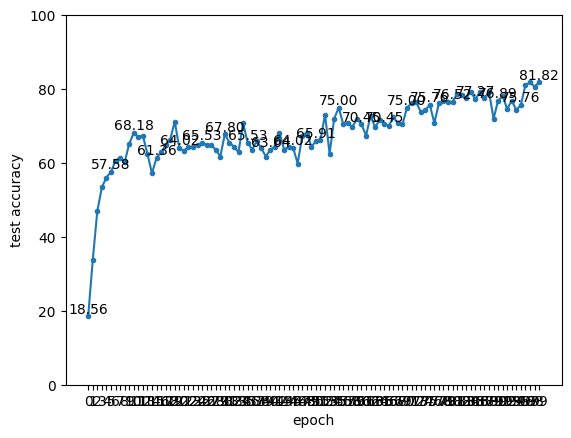

In [ ]:
plt.plot(np.arange(len(epochs_x)), epochs_acc, marker = '.')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.ylim(0, 100)
plt.xticks(np.arange(len(epochs_x)))
for i, txt in enumerate(epochs_acc):
    if i%5 ==0 or i == epochs-1:
        plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', color = 'k')
plt.show()

In [ ]:
# with open(f'{achitecture}-Training_Test-TM.npy', 'wb') as f:
#     np.save(f, np.array(epochs_x))
#     np.save(f, np.array(epochs_y))
#     np.save(f, np.array(epochs_acc))